In [3]:
#Importing Libraries

import fcsparser as fcsp
import re
import os
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, normalize, LabelEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV, ParameterGrid, train_test_split, RepeatedStratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error, confusion_matrix
from sklearn.decomposition import PCA


import random

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
# Importing data

def load_data(dir):
    print('---- loading data ---->')
    data = {}
    for dirname, _, filename in os.walk(dir):
        for file in filename:
            path = os.path.join(dirname, file)
            # Slicing in order to remove .fcs from filename
            f_name = ''.join(list(file)[:-4])
            data[f_name] = pd.DataFrame(fcsp.parse(path, meta_data_only=False, reformat_meta=True)[1])
    return data, fcsp.parse(path, meta_data_only=False, reformat_meta=True)[0]['_channels_']
 

'''
for dirname, _, filename in os.walk(HERE):
    for file in filename:
      path = os.path.join()
        meta = fcsparser.parse(, meta_data_only=True, reformat_meta=True)
'''

def prepData(x,scaler=None):
        """
        Normalize data
        """
        if not scaler:
                scaler = StandardScaler().fit(x)
        x_transformed= np.nan_to_num(np.array(scaler.transform(x)))
        return normalize(x_transformed),scaler

# Loading fcs file data into a dictionary
global path

dir = os.path.abspath(os.path.dirname('C:\\Users\\ankit\\Downloads\\FCM Data\\FCM Data For Kartik - Copy\\pc'))
dir = os.path.join(dir, 'C:\\Users\\ankit\\Downloads\\FCM Data\\FCM Data For Kartik - Copy\\pc')
data, channels = load_data(dir)

# Function to return list of different taken samples
def sample_list(det = data):
    return set([sample[0:3] for sample in det.keys()])


# Function to check the dimensions of our fcs files
def checkDimensions(data, dimensions):
    for sample in data:
        if data[sample].shape != dimensions: print(sample, data[sample].shape)
    return 



---- loading data ---->


In [5]:
data

{'PCD1_1':              FSC-A   FSC-H        SSC-A      FITC-A         PE-A   PE-Cy5-A  \
 0       418.399994   799.0   432.630005  116.820000 -1304.820068 -33.660000   
 1       807.200012   770.0   931.590027  -39.599998  -485.100006  69.300003   
 2       876.000000   883.0   481.140015   47.520000  -416.790009 -61.380001   
 3      1064.000000  1326.0  5192.550293   58.410000    -2.970000 -23.760000   
 4       427.200012   894.0   964.260010   27.720001   177.210007 -45.540001   
 ...            ...     ...          ...         ...          ...        ...   
 99995   102.400002   847.0   711.809998   49.500000  -335.610016   0.000000   
 99996   565.600037  1035.0  1146.420044   21.780001   117.809998  73.260002   
 99997   767.200012  1496.0  2064.149902   37.619999  -339.570007 -17.820000   
 99998   125.599998   718.0   809.820007  173.250000   711.809998 -10.890000   
 99999   320.000000   819.0   538.559998 -114.840004  -222.750000  52.470001   
 
          PE-Cy7-A       APC

In [21]:
checkDimensions(data,data[random.choice(list(data.keys()))].shape)

In [7]:
#concatenating the dataframes of all triplicates -->
def triplicates_combined(data = data):
    deta = {}
    for key in data.keys():
        deta[key[:4]]= pd.concat([data[key[:4]+'_1'],data[key[:4]+'_2'],data[key[:4]+'_3']],axis=0)
    return deta

triplicates_combined()

{'PCD1':              FSC-A   FSC-H        SSC-A      FITC-A         PE-A   PE-Cy5-A  \
 0       418.399994   799.0   432.630005  116.820000 -1304.820068 -33.660000   
 1       807.200012   770.0   931.590027  -39.599998  -485.100006  69.300003   
 2       876.000000   883.0   481.140015   47.520000  -416.790009 -61.380001   
 3      1064.000000  1326.0  5192.550293   58.410000    -2.970000 -23.760000   
 4       427.200012   894.0   964.260010   27.720001   177.210007 -45.540001   
 ...            ...     ...          ...         ...          ...        ...   
 99995   774.400024   866.0   666.270020  -11.880000   388.080017 -10.890000   
 99996  1298.400024  1048.0   514.799988   85.139999   209.880005 -34.650002   
 99997   838.400024   875.0   388.080017   -5.940000  -621.720032  20.790001   
 99998   495.200012   807.0   432.630005   90.090004   121.770004  -8.910000   
 99999   878.400024  1054.0  2095.830078  169.290009   505.890015  54.450001   
 
          PE-Cy7-A       APC-A

In [8]:
data.keys()

dict_keys(['PCD1_1', 'PCD1_2', 'PCD1_3', 'PCD2_1', 'PCD2_2', 'PCD2_3', 'PCD3_1', 'PCD3_2', 'PCD3_3', 'PCD4_1', 'PCD4_2', 'PCD4_3', 'PCD5_1', 'PCD5_2', 'PCD5_3'])

In [9]:
Day_1 = dict([(key,data[key]) for key in data.keys() if key.endswith('_1')])
Day_1.keys()

dict_keys(['PCD1_1', 'PCD2_1', 'PCD3_1', 'PCD4_1', 'PCD5_1'])

In [10]:
Day_1

{'PCD1_1':              FSC-A   FSC-H        SSC-A      FITC-A         PE-A   PE-Cy5-A  \
 0       418.399994   799.0   432.630005  116.820000 -1304.820068 -33.660000   
 1       807.200012   770.0   931.590027  -39.599998  -485.100006  69.300003   
 2       876.000000   883.0   481.140015   47.520000  -416.790009 -61.380001   
 3      1064.000000  1326.0  5192.550293   58.410000    -2.970000 -23.760000   
 4       427.200012   894.0   964.260010   27.720001   177.210007 -45.540001   
 ...            ...     ...          ...         ...          ...        ...   
 99995   102.400002   847.0   711.809998   49.500000  -335.610016   0.000000   
 99996   565.600037  1035.0  1146.420044   21.780001   117.809998  73.260002   
 99997   767.200012  1496.0  2064.149902   37.619999  -339.570007 -17.820000   
 99998   125.599998   718.0   809.820007  173.250000   711.809998 -10.890000   
 99999   320.000000   819.0   538.559998 -114.840004  -222.750000  52.470001   
 
          PE-Cy7-A       APC

(1500000, 12)


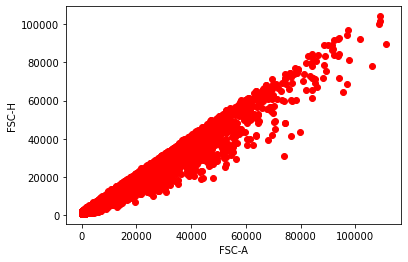

In [12]:
# function to plot combined data of all days(1-5) for a particular sample

def plot_sample(data, key):
    key = key[:3]
    original = pd.DataFrame()
    for day in range(1,6):
        l = pd.concat([data[key+str(day)+'_'+str(i)] for i in range(1,4)], axis = 0)
        original = pd.concat([original, l])
    plot = original
    print(plot.shape)
    plt.scatter(plot['FSC-A'],plot['FSC-H'], color = 'red')
    plt.xlabel('FSC-A')
    plt.ylabel('FSC-H')
    plt.show()

plot_sample(data,'PCD')

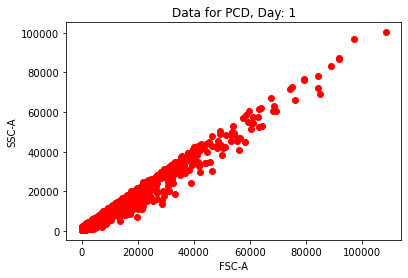

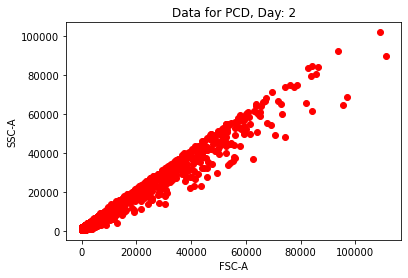

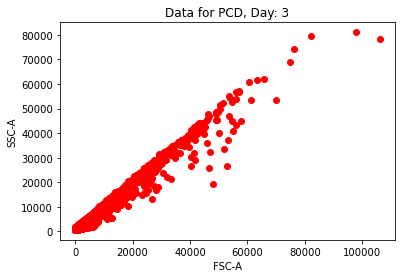

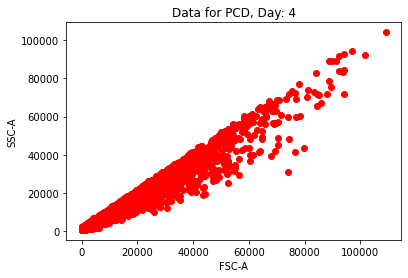

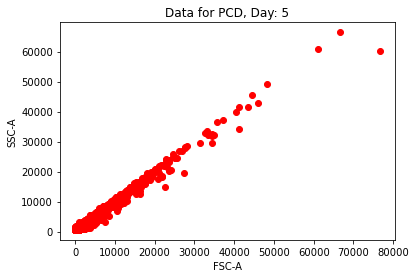

[None, None, None, None, None]

In [13]:
def plot_sample_data(data, key, day = 1):
    key = key[:3]
    plot = pd.concat([data[key+str(day)+'_'+str(i)] for i in range(1,4)])
    plt.scatter(plot['FSC-A'],plot['FSC-H'], color = 'red')
    plt.xlabel('FSC-A')
    plt.ylabel('SSC-A')
    plt.title(f'Data for {key}, Day: {day}')
    plt.show()
    

[plot_sample_data(data, 'PCD',i) for i in range(1,6)]

(1500000, 12)


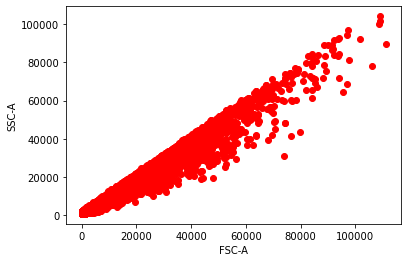

In [14]:
# function to plot combined data of all days(1-5) for a particular sample

def plot_sample(data, key):
    key = key[:3]
    original = pd.DataFrame()
    for day in range(1,6):
        l = pd.concat([data[key+str(day)+'_'+str(i)] for i in range(1,4)], axis = 0)
        original = pd.concat([original, l])
    plot = original
    print(plot.shape)
    plt.scatter(plot['FSC-A'],plot['FSC-H'], color = 'red')
    plt.xlabel('FSC-A')
    plt.ylabel('SSC-A')
    plt.show()

plot_sample(data,'PCD')

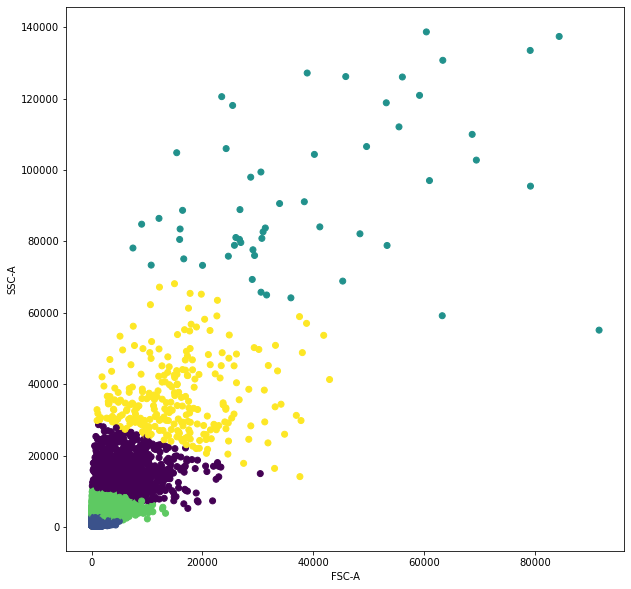

In [23]:
# Running Clustering with feature vector of size 3 in place of 3000 feature vector

num_clusters = 5
cols2 = random.choice(list(data.keys()))
sample = data[cols2][['FSC-A','SSC-A']]
kmean = KMeans(n_clusters = num_clusters).fit(sample)
kmean.predict(sample)
klabels = kmean.labels_

#filter rows of original data

cluster_count1 = np.zeros(num_clusters)
for cluster in range(num_clusters):
    filter_lb = sample[klabels == cluster]


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)
ax.scatter(sample['FSC-A'],sample['SSC-A'],c = klabels) 
plt.xlabel("FSC-A")
plt.ylabel("SSC-A")

plt.show()


Cluster 1 Inertia 4229229707264.0
Cluster 2 Inertia 1569516421120.0
Cluster 3 Inertia 927601721344.0
Cluster 4 Inertia 663810342912.0
Cluster 5 Inertia 509989748736.0
Cluster 6 Inertia 431794290688.0
Cluster 7 Inertia 383729139712.0
Cluster 8 Inertia 338964611072.0
Cluster 9 Inertia 301606076416.0
Cluster 10 Inertia 267414044672.0
Cluster 11 Inertia 244380499968.0
Cluster 12 Inertia 225086078976.0
Cluster 13 Inertia 211065126912.0
Cluster 14 Inertia 197555830784.0
Cluster 15 Inertia 185512902656.0
Cluster 16 Inertia 174313832448.0
Cluster 17 Inertia 161082261504.0
Cluster 18 Inertia 152793202688.0
Cluster 19 Inertia 145925324800.0


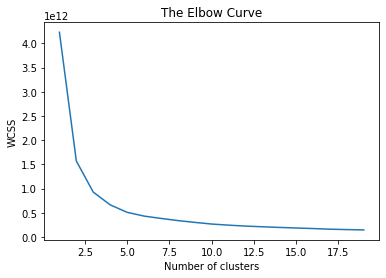

In [16]:
def elbow_curve(sample = sample):
    wcss = []
    for i in range(1,20):
      kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
      kmeans.fit(sample)
      wcss.append(kmeans.inertia_)
      print('Cluster', i, 'Inertia', kmeans.inertia_,)
    plt.plot(range(1,20),wcss)
 
    plt.title('The Elbow Curve')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
    plt.show()

elbow_curve()

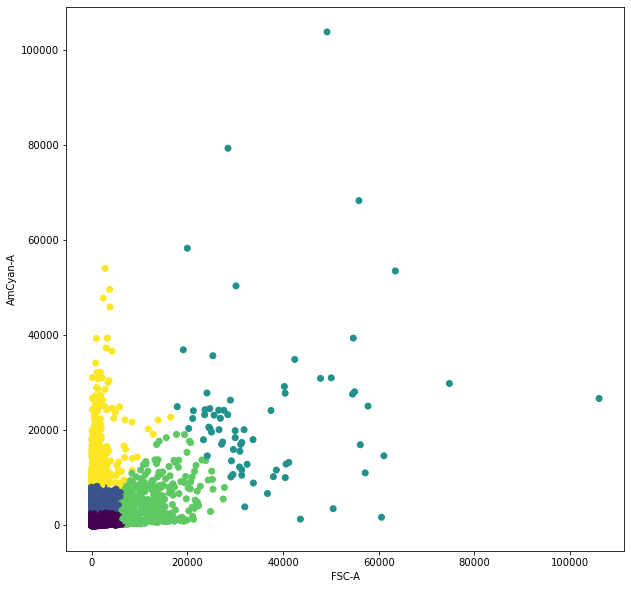

In [22]:
num_clusters = 5
cols2 = random.choice(list(data.keys()))
sample = data[cols2][['FSC-A','AmCyan-A']]
kmean = KMeans(n_clusters = num_clusters).fit(sample)
kmean.predict(sample)
klabels = kmean.labels_

#filter rows of original data

cluster_count1 = np.zeros(num_clusters)
for cluster in range(num_clusters):
    filter_lb = sample[klabels == cluster]


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)
ax.scatter(sample['FSC-A'],sample['AmCyan-A'],c = klabels) 
plt.xlabel("FSC-A")
plt.ylabel("AmCyan-A")
plt.show()

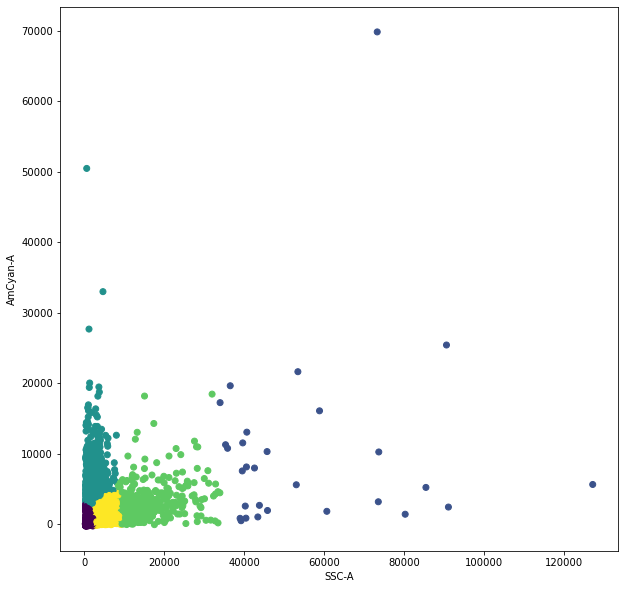

In [24]:
num_clusters = 5
cols2 = random.choice(list(data.keys()))
sample = data[cols2][['SSC-A','AmCyan-A']]
kmean = KMeans(n_clusters = num_clusters).fit(sample)
kmean.predict(sample)
klabels = kmean.labels_

#filter rows of original data

cluster_count1 = np.zeros(num_clusters)
for cluster in range(num_clusters):
    filter_lb = sample[klabels == cluster]


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)
ax.scatter(sample['SSC-A'],sample['AmCyan-A'],c = klabels) 
plt.xlabel("SSC-A")
plt.ylabel("AmCyan-A")
plt.show()

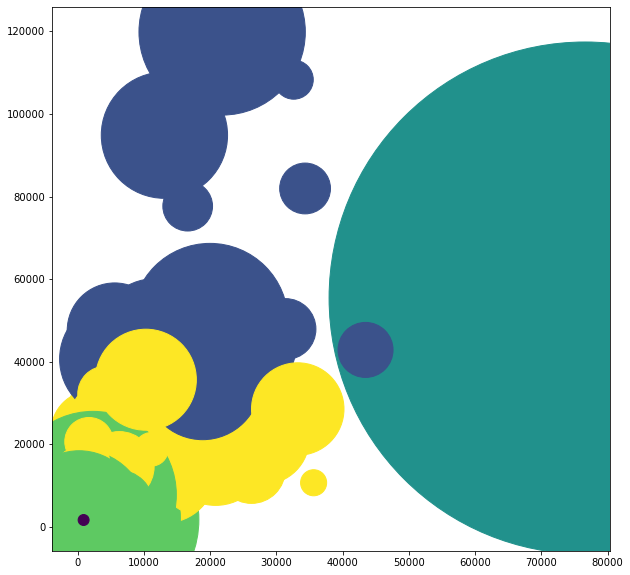

In [25]:
num_clusters = 5
cols2 = random.choice(list(data.keys()))
sample = data[cols2][['FSC-A','SSC-A','AmCyan-A']]
kmean = KMeans(n_clusters = num_clusters).fit(sample)
kmean.predict(sample)
klabels = kmean.labels_

#filter rows of original data

cluster_count1 = np.zeros(num_clusters)
for cluster in range(num_clusters):
    filter_lb = sample[klabels == cluster]


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, )
ax.scatter(sample['FSC-A'],sample['SSC-A'],sample['AmCyan-A'],c = klabels) 

plt.show()

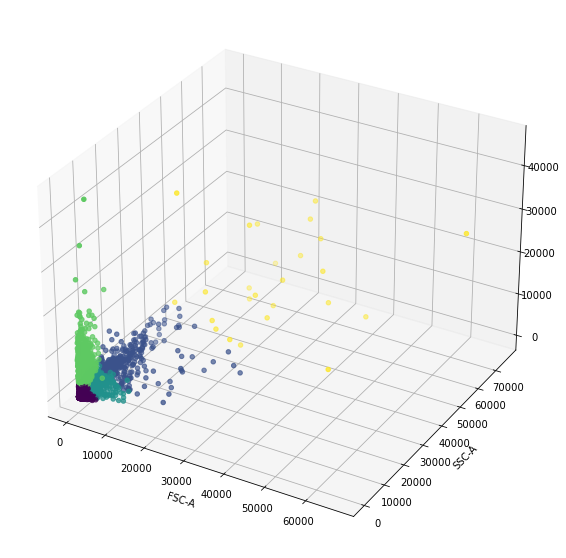

In [31]:
num_clusters = 5
cols2 = random.choice(list(data.keys()))
sample = data[cols2][['FSC-A','SSC-A','AmCyan-A']]
kmean = KMeans(n_clusters = num_clusters).fit(sample)
kmean.predict(sample)
klabels = kmean.labels_

#filter rows of original data

cluster_count1 = np.zeros(num_clusters)
for cluster in range(num_clusters):
    filter_lb = sample[klabels == cluster]


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d' )
ax.scatter(sample['FSC-A'],sample['SSC-A'],sample['AmCyan-A'],c = klabels) 
plt.xlabel("FSC-A", )
plt.ylabel("SSC-A",)


plt.show()

In [29]:
print(pd.DataFrame)

<class 'pandas.core.frame.DataFrame'>


AttributeError: module 'pandas' has no attribute 'data'